# Emotion Detection for Software Developers



Emotion Detection for Software Developers is an approach to determine the emotion of developers' written communication on platforms like Jira, or GitHub, emotions could be frustration caused by delays in merging pull requests, or joy caused by merging new features or having new releases.


# Data



In [ ]:

!wget https://github.com/vcu-swim-lab/SE-Emotion-Cause-Replication/blob/main/Emotion_Classification/datasets/github-train.csv
!wget https://github.com/vcu-swim-lab/SE-Emotion-Cause-Replication/blob/main/Emotion_Classification/datasets/github-test.csv


--2024-02-28 01:27:15--  https://github.com/vcu-swim-lab/SE-Emotion-Cause-Replication/blob/main/Emotion_Classification/datasets/github-train.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 339791 (332K) [text/plain]
Saving to: ‘github-train.csv.1’

github-train.csv.1  100%[===================>] 331.83K  --.-KB/s    in 0.007s  

2024-02-28 01:27:16 (45.3 MB/s) - ‘github-train.csv.1’ saved [339791/339791]



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/github-train.csv')

In [ ]:
df

,id,Text,Anger,Love,Fear,Joy,Sadness,Surprise
0,704844644,This change doesn't affect anything but makes ...,0,0,0,1,0,0
1,886568180,Thanks very much for your feedback [USER] Your...,0,1,0,0,0,0
2,950480127,[BLOCK QUOTE].\n\nWorks perfectly that way! Th...,0,1,0,0,0,0
3,897560867,[USER] Thanks for the quick answers! It is goo...,0,1,0,0,0,0
4,878517138,[USER] I don't think that it would be possible...,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
1595,958353427,[USER] Any updates on this PR? Is it still nee...,0,0,0,0,0,1
1596,958721169,"Hi [USER], can you explain more what exactly y...",0,0,0,0,0,1
1597,524603224,I understand why we skip the work if there are...,0,0,0,0,0,1
1598,920311878,"I can't wait for this <3 \nI am curious, what ...",0,1,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 399
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2000 non-null   int64 
 1   Text      2000 non-null   object
 2   Anger     2000 non-null   int64 
 3   Love      2000 non-null   int64 
 4   Fear      2000 non-null   int64 
 5   Joy       2000 non-null   int64 
 6   Sadness   2000 non-null   int64 
 7   Surprise  2000 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 140.6+ KB


In [5]:
df.drop(columns='id', inplace=True)

# EDA

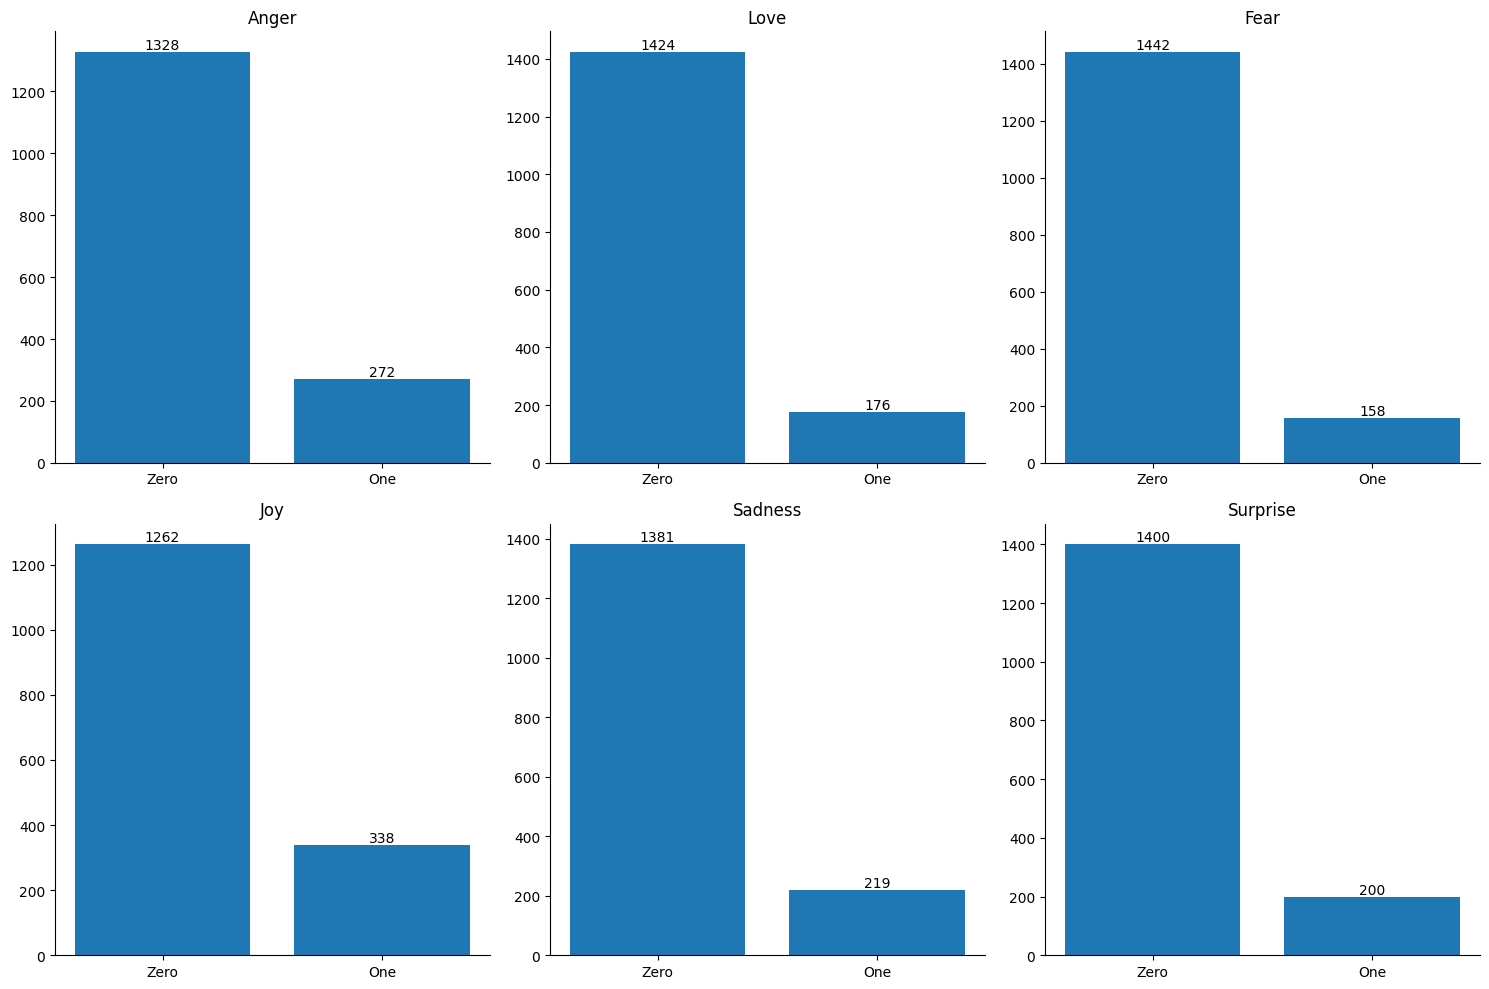

In [ ]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axs array to iterate over each subplot
axs = axs.flatten()
features = ['Anger', 'Love', 'Fear', 'Joy', 'Sadness', 'Surprise']
# Plot zeros and ones for each feature
for i, feature in enumerate(features):
    zeros = (df[feature] == 0).sum()
    ones = (df[feature] == 1).sum()
    axs[i].bar(['Zero', 'One'], [zeros, ones])
    axs[i].set_title(feature)
    axs[i].spines[['top', 'right']].set_visible(False)
    for index, value in enumerate([zeros, ones]):
        axs[i].text(index, value, str(value), ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


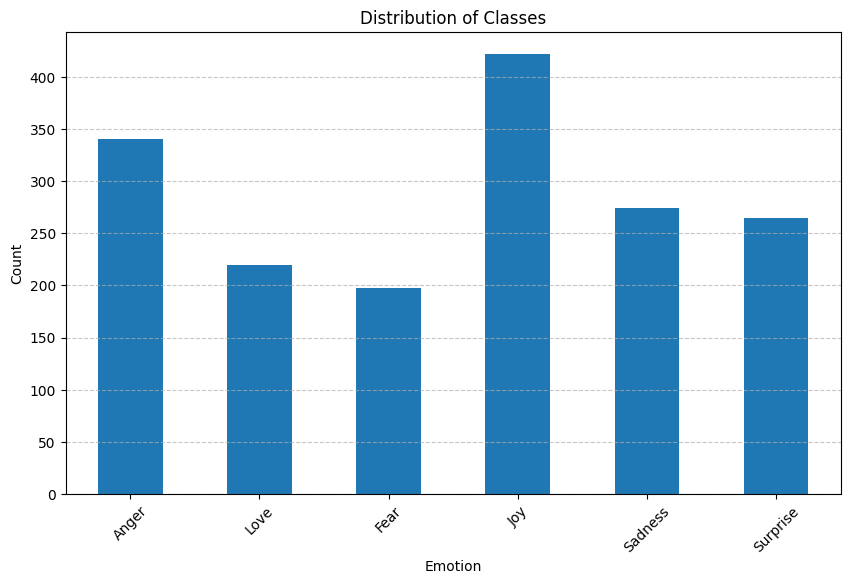

In [6]:
# Get the counts for each class
class_counts = df.iloc[:, 1:].sum()

# Plot the distribution of classes
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Distribution of Classes')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Preproccessing

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string


In [8]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [9]:
# Function to preprocess text
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing and remove punctuation
    tokens = [token.lower() for token in tokens if token.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [10]:
# Preprocess the text data
df['Preprocessed_Text'] = df['Text'].apply(preprocess_text)

In [11]:
df[['Text','Preprocessed_Text']]

,Text,Preprocessed_Text
0,This change doesn't affect anything but makes ...,change affect anything make code clear look li...
1,Thanks very much for your feedback [USER] Your...,thanks much feedback user point totally fair i...
2,[BLOCK QUOTE].\n\nWorks perfectly that way! Th...,block quote work perfectly way thanks
3,[USER] Thanks for the quick answers! It is goo...,user thanks quick answer good cleared way like...
4,[USER] I don't think that it would be possible...,user think would possible get fixed angular ma...
...,...,...
395,That's strange,strange
396,yes i am really surprised that it's only a p4 ...,yes really surprised long meantime try handle ...
397,I was quite surprised when my prebaked webpack...,quite surprised prebaked webpack cache used gi...
398,Thanks! That's what I was curious about,thanks curious


In [12]:
def multilabel_to_multiclass(row):
    # Find the column index with the highest value (1)
    max_index = row.idxmax()
    # Extract the class label from the column name
    class_label = max_index.split('_')[-1]
    return class_label


In [13]:
# Apply the function to each row to convert one-hot encoded data to multiclass
df['Multiclass_Label'] = df[['Anger', 'Love', 'Fear', 'Joy', 'Sadness', 'Surprise']].apply(multilabel_to_multiclass, axis=1)

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Numerical_Label'] = label_encoder.fit_transform(df['Multiclass_Label'])

In [15]:
df

,Text,Anger,Love,Fear,Joy,Sadness,Surprise,Preprocessed_Text,Multiclass_Label,Numerical_Label
0,This change doesn't affect anything but makes ...,0,0,0,1,0,0,change affect anything make code clear look li...,Joy,2
1,Thanks very much for your feedback [USER] Your...,0,1,0,0,0,0,thanks much feedback user point totally fair i...,Love,3
2,[BLOCK QUOTE].\n\nWorks perfectly that way! Th...,0,1,0,0,0,0,block quote work perfectly way thanks,Love,3
3,[USER] Thanks for the quick answers! It is goo...,0,1,0,0,0,0,user thanks quick answer good cleared way like...,Love,3
4,[USER] I don't think that it would be possible...,0,1,0,0,0,0,user think would possible get fixed angular ma...,Love,3
...,...,...,...,...,...,...,...,...,...,...
395,That's strange,0,0,0,0,0,1,strange,Surprise,5
396,yes i am really surprised that it's only a p4 ...,0,0,0,0,0,1,yes really surprised long meantime try handle ...,Surprise,5
397,I was quite surprised when my prebaked webpack...,0,1,0,0,0,1,quite surprised prebaked webpack cache used gi...,Love,3
398,Thanks! That's what I was curious about,0,1,0,0,0,1,thanks curious,Love,3


In [ ]:
X_train = df['Preprocessed_Text']
y_train = df['Numerical_Label']

In [ ]:
df_test = pd.read_csv('/content/github-test.csv')

In [ ]:
# do the same preprocessing for testing

df_test.drop(columns='id', inplace=True)
df_test['Preprocessed_Text'] = df_test['Text'].apply(preprocess_text)
df_test['Multiclass_Label'] = df_test[['Anger', 'Love', 'Fear', 'Joy', 'Sadness', 'Surprise']].apply(multilabel_to_multiclass, axis=1)
df_test['Numerical_Label'] = label_encoder.fit_transform(df_test['Multiclass_Label'])

In [ ]:
X_test = df_test['Preprocessed_Text']
y_test = df_test['Numerical_Label']

# Algorithms

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


In [19]:
tfidf_vectorizer = TfidfVectorizer()

X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

## Logistic Regression

In [20]:
lr = LogisticRegression(multi_class="ovr")

lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [21]:
y_pred = lr.predict(X_test)

In [22]:
y_pred_train = lr.predict(X_train)

In [23]:
f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_train

0.6987116090890494

In [24]:
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.4151366106476414

In [ ]:
y_pred_train_lr = lr.predict(X_train)
f1_score(y_train, y_pred_train_lr, average='weighted')

0.6696899905139674

## SVM

In [ ]:
rbf = svm.SVC(kernel='rbf').fit(X_train, y_train)
poly = svm.SVC(kernel='poly').fit(X_train, y_train)
linear = svm.SVC(kernel='linear').fit(X_train, y_train)

In [ ]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
linear_pred = linear.predict(X_test)

In [ ]:
poly_pred = poly.predict(X_train)
rbf_pred = rbf.predict(X_train)
linear_pred = linear.predict(X_train)

In [ ]:
f1_ploy = f1_score(y_train, poly_pred, average='weighted')
f1_rbf = f1_score(y_train, rbf_pred, average='weighted')
f1_linear = f1_score(y_train, linear_pred, average='weighted')

In [ ]:
f1_ploy = f1_score(y_test, poly_pred, average='weighted')
f1_rbf = f1_score(y_test, rbf_pred, average='weighted')
f1_linear = f1_score(y_test, linear_pred, average='weighted')

In [ ]:
print(f1_ploy)
print(f1_rbf)
print(f1_linear)

0.9962400386145116
0.9618292128222617
0.8236356411231097


## Naive Bayes



In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
nb_pred_train = nb.predict(X_train)
nb_pred_test = nb.predict(X_test)

In [ ]:
f1_nb_train = f1_score(y_train, nb_pred_train, average='weighted')
f1_nb_test = f1_score(y_test, nb_pred_test, average='weighted')

print(f1_nb_train)
print(f1_nb_test)

0.4591232488570382
0.251943280928641


## Decision Trees

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
y_pred_dt = decision_tree.predict(X_test)

In [ ]:
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
f1_dt

0.40224761247364915

In [ ]:
y_pred_train_dt = decision_tree.predict(X_train)
f1_score(y_train, y_pred_train_dt, average='weighted')

0.9981269319754078

## Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = random_forest.predict(X_test)

In [ ]:
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
f1_rf

0.4756321303477681

In [ ]:
y_pred_train = random_forest.predict(X_train)
f1_score(y_train, y_pred_train, average='weighted')

0.9981269319754078

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(random_forest, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


Cross-validation scores: [0.475    0.45     0.440625 0.4125   0.35625 ]
Mean CV score: 0.42687500000000006


Since the Random forset is the most powerful model on testing so far, but we have ovefitting let's try to tweak some paramerts and see what will happen

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],           # Number of trees in the forest
    'max_depth': [10, 20, 30],                  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']   # Number of features to consider for splitting
}

# Perform grid search to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_random_forest = grid_search.best_estimator_



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
print(grid_search.best_params_)

{'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, max_features='auto', min_samples_split=10,
                       n_estimators=200, random_state=42)

In [ ]:
y_pred_train = best_random_forest.predict(X_train)
y_pred_test = best_random_forest.predict(X_test)

In [ ]:
# Evaluate the model
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

In [ ]:
print(train_f1)
print(test_f1)

0.6309151351861221
0.4110775588519681
